In [3]:
from manim import *

Manim Community v0.17.2

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import networkx as nx

In [236]:
class Helix(Surface):

    def __init__(
        self,
        major_radius: float = 1,
        minor_radius: float = .15,
        turning: float = 1,
        u_range=(-TAU, TAU),
        v_range=(-TAU, TAU),
        phase=0,
        resolution=None,
        **kwargs,
    ):
        if config.renderer == RendererType.OPENGL:
            res_value = (101, 101)
        elif config.renderer == RendererType.CAIRO:
            res_value = (24, 24)

        resolution = resolution if resolution is not None else res_value

        self.R = major_radius
        self.r = minor_radius
        self.turning = turning
        self.phase = phase

        super().__init__(
            self.func,
            u_range=u_range,
            v_range=v_range,
            resolution=resolution,
            **kwargs,
        )

    def helix_func(self, v):
        x = self.turning * v
        y = (self.R - self.r) * np.cos(v + self.phase)
        z = (self.R - self.r) * np.sin(v + self.phase)
        return np.array([x, y, z])

    def func(self, u, v):
        x = self.r * np.sin(v) + self.turning * (u)
        y = (self.R + self.r * np.cos(v + self.phase)) * np.cos(u + self.phase)
        z = (self.R + self.r * np.cos(v + self.phase)) * np.sin(u + self.phase)
        return np.array([x, y, z])


class DNADoubleHelix(VGroup):

    def __init__(
        self,
        band_frequency: float = 3,
        stroke_width: float = 0,
        **kwargs,
    ):
        red_strand = Helix(fill_color=RED,
                           checkerboard_colors=None,
                           stroke_width=stroke_width,
                           **kwargs)

        blue_strand = Helix(fill_color=BLUE,
                            checkerboard_colors=None,
                            stroke_width=stroke_width,
                            phase=PI,
                            **kwargs)
        
        objs = [red_strand, blue_strand]
        v_range = kwargs.get("v_range", (-TAU, TAU))
        turning = kwargs.get("turning", 1)
        minor_radius = kwargs.get("minor_radius", .2)

        for v in np.arange(*v_range, PI * turning / band_frequency):
            band_1 = Line3D(
                start=red_strand.helix_func(v),
                end=np.array([v, 0., 0.]),
                thickness=minor_radius / 2,
                color=WHITE, resolution=8
            )
            band_2 = Line3D(
                start=np.array([v, 0., 0.]),
                end=blue_strand.helix_func(v),
                thickness=minor_radius / 2,
                color=GOLD, resolution=8
            )
            objs.extend([band_1, band_2])

        super().__init__(*objs)


class RNAHelix(VGroup):

    def __init__(
        self,
        band_frequency: float = 3,
        stroke_width: float = 0,
        strand_colour=BLUE,
        **kwargs,
    ):
        strand = Helix(fill_color=strand_colour,
                       checkerboard_colors=None,
                       stroke_width=stroke_width,
                       **kwargs)
        
        objs = [strand]
        v_range = kwargs.get("v_range", (-TAU, TAU))
        turning = kwargs.get("turning", 1)
        minor_radius = kwargs.get("minor_radius", .2)

        band_colour = WHITE
        for v in np.arange(*v_range, PI * turning / band_frequency):
            band_colour = WHITE if band_colour == GOLD else GOLD
            band = Line3D(
                start=strand.helix_func(v),
                end=np.array([v, 0., 0.]),
                thickness=minor_radius / 2,
                color=band_colour, resolution=8
            )
            objs.append(band)

        super().__init__(*objs)

[01/04/23 16:09:29] INFO                                                                   ]8;id=286436;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=226040;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py#736\736]8;;\
                             File ready at                                                                         
                             'C:\Users\dylan\OneDrive\Video\ProtoEvo\manim\media\images\ma                         
                             nim\RNARotate_ManimCE_v0.17.2.png'                                                    
                                                                                                                   

                    INFO     Rendered RNARotate                                                        ]8;id=450797;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene.py\scene.py]8;;\:]8;id=116276;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene.py#241\241]8;;\
                             Played 1 animations                                                                   

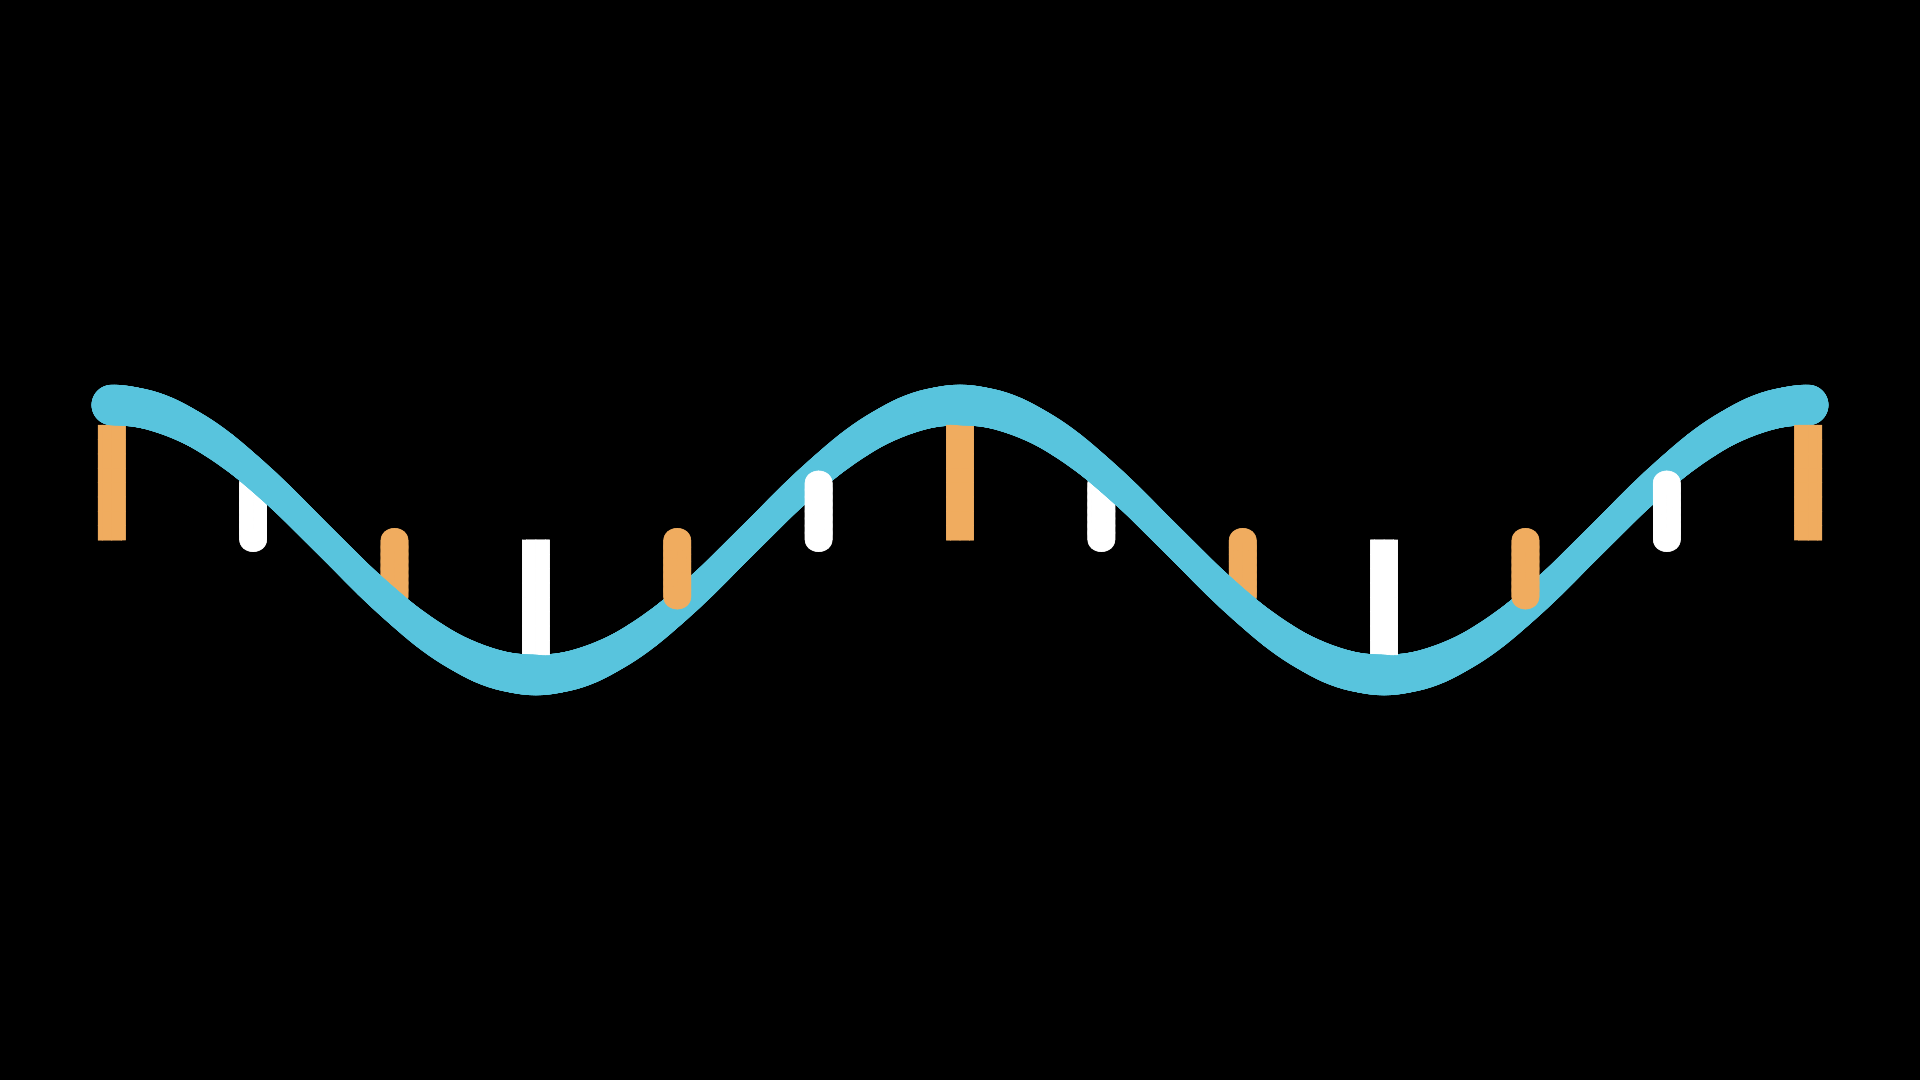

In [237]:
%%manim -s --disable_caching RNARotate


class RNARotate(ThreeDScene):

    def construct(self):

        self.camera.set_focal_distance(10000)
        self.camera.should_apply_shading = False

        # set double helix parameters
        amp, phi = 0.5, 1
        helix_turns = 5

        min_t, max_t = -2 * helix_turns * PI / phi, 2 * helix_turns * PI / phi
        # # set axes parameters
        # self.axes = ThreeDAxes(
        #     x_range=[min_t, max_t, 1],
        #     y_range=[-1.5, 1.5, 1],
        #     z_range=[-1.5, 1.5, 1],
        #     x_length=10,
        #     y_length=10,
        #     z_length=10,
        # )
        # self.add(self.axes, self.axes.get_axis_labels())

        time_tracker = ValueTracker(0)
        self.add(time_tracker)
        time_tracker.add_updater(lambda mobject, dt: mobject.increment_value(dt))

        # set up double helix
        # helix = DNADoubleHelix(turning=phi, major_radius=1, v_range=(min_t, max_t), resolution=32)
        helix = RNAHelix(turning=phi, major_radius=1, v_range=(min_t, max_t), resolution=32)

        degrees_per_second = -25 * DEGREES
        helix.add_updater(lambda mob, dt: helix.rotate(degrees_per_second * dt, axis=np.array([1, 0, 0])))

        self.add(helix)
        self.wait(360 * DEGREES / np.abs(degrees_per_second))


In [232]:
%%manim CurvedArrowScene


class CurvedArrowScene(Scene):

    def construct(self):
        x = 5
        arrow = CurvedArrow([0, 0, 0], [x, 0, 0], angle=PI / 2)
        self.play(Create(arrow))


[01/04/23 04:28:50] INFO     Animation 0 : Partial movie file written in                   ]8;id=113475;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=367121;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\dylan\OneDrive\Video\ProtoEvo\manim\media\videos\ma                         
                             nim\1080p60\partial_movie_files\CurvedArrowScene\2902699114_2                         
                             515056802_223132457.mp4'                                                              

                    INFO     Combining to Movie file.                                      ]8;id=799649;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=292099;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py#617\617]8;;\

                    INFO                                                                   ]8;id=886209;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=588215;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py#736\736]8;;\
                             File ready at                                                                         
                             'C:\Users\dylan\OneDrive\Video\ProtoEvo\manim\media\videos\ma                         
                             nim\1080p60\CurvedArrowScene.mp4'                                                     
                                                                                                                   

                    INFO     Rendered CurvedArrowScene                                                 ]8;id=707764;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene.py\scene.py]8;;\:]8;id=673918;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene.py#241\241]8;;\
                             Played 1 animations                                                                   

In [8]:
import random

def random_bool():
    return bool(random.getrandbits(1))


class RandomFormula:

    def __init__(self, input_nodes, graph):
        self.input_nodes = input_nodes
        self.graph = graph
        random.shuffle(self.input_nodes)
    
        self.not_signs = {
            n: random_bool() for n in self.input_nodes
        }
        self.and_or_or = [random_bool() for _ in range(len(self.input_nodes) - 1)]

    def get_term(self, node):
        return self.graph.nodes[node]['state'] ^ self.not_signs[node]

    def __call__(self) -> bool:
        node = self.input_nodes[0]
        result = self.get_term(node)
        
        if len(self.input_nodes) == 1:
            return result

        for i, node in enumerate(self.input_nodes[1:]):
            term = self.get_term(node)
            result = result and term if self.and_or_or[i - 1] else result or term

        return result

    def __str__(self) -> str:
        result = ''
        for i, node in enumerate(self.input_nodes):
            result += '!' if self.not_signs[node] else ''
            result += f'n_{node}'
            if i < len(self.input_nodes) - 1:
                result += ' & ' if self.and_or_or[i] else ' | '
        return f'({result})'


def create_random_boolean_network(n_nodes, p=0.5, seed=None):

    rbn = nx.fast_gnp_random_graph(n_nodes, p, seed=seed, directed=True)

    if seed is not None:
        random.seed(seed)

    for node_id in rbn.nodes:
        rbn.nodes[node_id]['state'] = random_bool()
        rbn.nodes[node_id]['formula'] = RandomFormula(list(rbn.neighbors(node_id)), rbn)

        print(f'Node {node_id} has formula {rbn.nodes[node_id]["formula"]}')
    
    print()
    for node_id in rbn.nodes:
        print(f'Node {node_id} has state {rbn.nodes[node_id]["state"]}, and next state {rbn.nodes[node_id]["formula"]()}')
    
    return rbn

In [9]:
rbn = create_random_boolean_network(15, p=0.2, seed=42)

Node 0 has formula (n_9 | n_7 & n_11 & !n_6)
Node 1 has formula (!n_4 | n_3 | n_12)
Node 2 has formula (!n_9 & n_12 & !n_3)
Node 3 has formula (n_1 & !n_4 & n_8)
Node 4 has formula (n_8 & n_13 & n_11 | n_10)
Node 5 has formula (n_2)
Node 6 has formula (!n_3 | n_13 & !n_9)
Node 7 has formula (!n_9 & !n_8 | n_13 & n_1)
Node 8 has formula (!n_9 & n_10)
Node 9 has formula (!n_3 | n_6 & !n_14)
Node 10 has formula (n_9 & n_1 | !n_12)
Node 11 has formula (n_14 & n_4)
Node 12 has formula (!n_2 & !n_14 & n_6)
Node 13 has formula (!n_14 | !n_8 | !n_6 | n_0 | n_5 & !n_11 & n_3 & !n_9 & n_1)
Node 14 has formula (n_3 | !n_11 | !n_13 | !n_6 | n_9)

Node 0 has state True, and next state False
Node 1 has state True, and next state True
Node 2 has state False, and next state False
Node 3 has state True, and next state True
Node 4 has state False, and next state False
Node 5 has state False, and next state False
Node 6 has state False, and next state True
Node 7 has state False, and next state True
Node

In [239]:
%%manim --disable_caching GeneRegulatoryNetwork


class GeneRegulatoryNetwork(Scene):

    def construct(self):

        schedule = {
            'make_graph': 2,
            'wait_before_gene_text': 2,
            'create_gene_text': 1,
            'wait_before_node_text': 1,
            'create_node_text': 1,
            'wait_before_edge_text': 7,
            'create_edge_text': 1,
            'wait_before_fade_node_text': 3,
            'wait_before_fade_edge_text': 3,
            'wait_before_fade_graph': 10,
        }
        
        self.zoom = .5

        def get_node_colour(n):
            return GREEN if rbn.nodes[n].get('state', False) else RED

        def get_edge_colour(n1, n2):
            return RED if rbn.nodes[n1]['formula'].get_term(n2) else GREEN

        def get_vertex_config():
            return {
                n: {
                    'radius': 0.15, 'fill_opacity': 1, 'stroke_width': 0,
                    'fill_color': get_node_colour(n),
                }
                for n in rbn.nodes
            }

        def make_graph(layout):
            lt = {
                n: [*(self.zoom * layout[n]), 0] for n in rbn.nodes
            }
            edge_config = {
                e: {"stroke_color": get_edge_colour(*e)} for e in rbn.edges
            }
            return Graph(list(rbn.nodes), list(rbn.edges), layout=lt, # labels=True,
                         vertex_config=get_vertex_config(), edge_config=edge_config)
    
        init_layout = nx.spring_layout(rbn, iterations=1, seed=1, k=1)
        graph = make_graph(init_layout)
        self.add(graph)
        
        self.layouts = []
        layout = init_layout

        for i in range(20):
            layout = nx.spring_layout(rbn, iterations=1, seed=1, k=2, pos=layout)
            self.layouts.append(layout)

        def grow_graph(mob, t):
            self.zoom = .1 + 2.4 * t

            n_layouts = len(self.layouts)
            layout_idx = min(n_layouts - 1, math.ceil(t * n_layouts))
            target_layout = self.layouts[layout_idx]

            last_layout_idx = max(0, layout_idx - 1)
            last_layout = self.layouts[last_layout_idx]
        
            dt = n_layouts * t - last_layout_idx
            layout = {
                n: last_layout[n] + dt * (pos - last_layout[n])
                for n, pos in target_layout.items()
            }

            mob.become(make_graph(layout))
            return mob

        self.play(UpdateFromAlphaFunc(graph, grow_graph), run_time=schedule['make_graph'])

        degrees_per_second = -1 * DEGREES
        graph.add_updater(lambda mob, dt: mob.rotate(degrees_per_second * dt))

        self.time_since_change = 0
        def update_graph(mob, dt):
            self.time_since_change += dt
            if self.time_since_change > 1:
                self.time_since_change = 0
                for node_id in rbn.nodes:
                    rbn.nodes[node_id]['state'] = rbn.nodes[node_id]['formula']()
                    mob.vertices[node_id].set_color(get_node_colour(node_id))
                for e in rbn.edges:
                    mob.edges[e].set_color(get_edge_colour(*e))

        graph.add_updater(update_graph)

        self.wait(schedule['wait_before_gene_text'])

        with register_font('./FiraCode-Retina.ttf'):
            gene_text = Text("Each node\nrepresents a gene", font='Fira Code Retina', font_size=25)
        gene_text.add_updater(lambda mob: mob.next_to(graph[10], RIGHT, buff=0.2))

        self.play(Create(gene_text), run_time=schedule['create_gene_text'])
        self.wait(schedule['wait_before_node_text'])

        with register_font('./FiraCode-Retina.ttf'):
            node_text = Text("Node colour indicates\nif the gene is active", font='Fira Code Retina', font_size=25)
        node_text.add_updater(lambda mob: mob.next_to(graph[5], RIGHT, buff=0.2))

        self.play(Create(node_text), run_time=schedule['create_node_text'])
        self.wait(schedule['wait_before_edge_text'])

        with register_font('./FiraCode-Retina.ttf'):
            edge_text = Text("Edges indicate how\ngenes regulate\none another", font='Fira Code Retina', font_size=25)
        edge_text.add_updater(lambda mob: mob.next_to(graph[12], RIGHT, buff=0.2))

        self.play(Create(edge_text), FadeOut(gene_text), run_time=schedule['create_edge_text'])
        self.wait(schedule['wait_before_fade_node_text'])
        self.play(FadeOut(node_text), run_time=1)
        self.wait(schedule['wait_before_fade_edge_text'])
        self.play(FadeOut(edge_text), run_time=1)

        self.wait(schedule['wait_before_fade_graph'])


[01/04/23 19:50:46] INFO     Caching disabled.                                                 ]8;id=675981;file://C:\tools\Manim\Lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=906231;file://C:\tools\Manim\Lib\site-packages\manim\renderer\cairo_renderer.py#68\68]8;;\

[01/04/23 19:50:55] INFO     Animation 0 : Partial movie file written in                   ]8;id=531699;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=403159;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\dylan\OneDrive\Video\ProtoEvo\manim\media\videos\ma                         
                             nim\1080p60\partial_movie_files\GeneRegulatoryNetwork\uncache                         
                             d_00000.mp4'                                                                          

                    INFO     Caching disabled.                                                 ]8;id=774814;file://C:\tools\Manim\Lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=939394;file://C:\tools\Manim\Lib\site-packages\manim\renderer\cairo_renderer.py#68\68]8;;\

[01/04/23 19:50:59] INFO     Animation 1 : Partial movie file written in                   ]8;id=599425;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=683501;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\dylan\OneDrive\Video\ProtoEvo\manim\media\videos\ma                         
                             nim\1080p60\partial_movie_files\GeneRegulatoryNetwork\uncache                         
                             d_00001.mp4'                                                                          

                    INFO     Caching disabled.                                                 ]8;id=525721;file://C:\tools\Manim\Lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=158189;file://C:\tools\Manim\Lib\site-packages\manim\renderer\cairo_renderer.py#68\68]8;;\

[01/04/23 19:51:02] INFO     Animation 2 : Partial movie file written in                   ]8;id=942802;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=878053;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\dylan\OneDrive\Video\ProtoEvo\manim\media\videos\ma                         
                             nim\1080p60\partial_movie_files\GeneRegulatoryNetwork\uncache                         
                             d_00002.mp4'                                                                          

                    INFO     Caching disabled.                                                 ]8;id=677513;file://C:\tools\Manim\Lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=180941;file://C:\tools\Manim\Lib\site-packages\manim\renderer\cairo_renderer.py#68\68]8;;\

[01/04/23 19:51:05] INFO     Animation 3 : Partial movie file written in                   ]8;id=460767;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=549525;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\dylan\OneDrive\Video\ProtoEvo\manim\media\videos\ma                         
                             nim\1080p60\partial_movie_files\GeneRegulatoryNetwork\uncache                         
                             d_00003.mp4'                                                                          

                    INFO     Caching disabled.                                                 ]8;id=390963;file://C:\tools\Manim\Lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=962526;file://C:\tools\Manim\Lib\site-packages\manim\renderer\cairo_renderer.py#68\68]8;;\

[01/04/23 19:51:08] INFO     Animation 4 : Partial movie file written in                   ]8;id=354803;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=711875;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\dylan\OneDrive\Video\ProtoEvo\manim\media\videos\ma                         
                             nim\1080p60\partial_movie_files\GeneRegulatoryNetwork\uncache                         
                             d_00004.mp4'                                                                          

                    INFO     Caching disabled.                                                 ]8;id=678748;file://C:\tools\Manim\Lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=350905;file://C:\tools\Manim\Lib\site-packages\manim\renderer\cairo_renderer.py#68\68]8;;\

[01/04/23 19:51:29] INFO     Animation 5 : Partial movie file written in                   ]8;id=711332;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=405341;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\dylan\OneDrive\Video\ProtoEvo\manim\media\videos\ma                         
                             nim\1080p60\partial_movie_files\GeneRegulatoryNetwork\uncache                         
                             d_00005.mp4'                                                                          

                    INFO     Caching disabled.                                                 ]8;id=688457;file://C:\tools\Manim\Lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=950369;file://C:\tools\Manim\Lib\site-packages\manim\renderer\cairo_renderer.py#68\68]8;;\

[01/04/23 19:51:34] INFO     Animation 6 : Partial movie file written in                   ]8;id=85461;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=611046;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\dylan\OneDrive\Video\ProtoEvo\manim\media\videos\ma                         
                             nim\1080p60\partial_movie_files\GeneRegulatoryNetwork\uncache                         
                             d_00006.mp4'                                                                          

                    INFO     Caching disabled.                                                 ]8;id=325301;file://C:\tools\Manim\Lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=687923;file://C:\tools\Manim\Lib\site-packages\manim\renderer\cairo_renderer.py#68\68]8;;\

[01/04/23 19:51:45] INFO     Animation 7 : Partial movie file written in                   ]8;id=623945;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=743266;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\dylan\OneDrive\Video\ProtoEvo\manim\media\videos\ma                         
                             nim\1080p60\partial_movie_files\GeneRegulatoryNetwork\uncache                         
                             d_00007.mp4'                                                                          

                    INFO     Caching disabled.                                                 ]8;id=394976;file://C:\tools\Manim\Lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=674751;file://C:\tools\Manim\Lib\site-packages\manim\renderer\cairo_renderer.py#68\68]8;;\

[01/04/23 19:51:49] INFO     Animation 8 : Partial movie file written in                   ]8;id=702667;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=736971;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\dylan\OneDrive\Video\ProtoEvo\manim\media\videos\ma                         
                             nim\1080p60\partial_movie_files\GeneRegulatoryNetwork\uncache                         
                             d_00008.mp4'                                                                          

                    INFO     Caching disabled.                                                 ]8;id=956771;file://C:\tools\Manim\Lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=551963;file://C:\tools\Manim\Lib\site-packages\manim\renderer\cairo_renderer.py#68\68]8;;\

[01/04/23 19:51:58] INFO     Animation 9 : Partial movie file written in                   ]8;id=533188;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=379404;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\dylan\OneDrive\Video\ProtoEvo\manim\media\videos\ma                         
                             nim\1080p60\partial_movie_files\GeneRegulatoryNetwork\uncache                         
                             d_00009.mp4'                                                                          

                    INFO     Caching disabled.                                                 ]8;id=997373;file://C:\tools\Manim\Lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=224597;file://C:\tools\Manim\Lib\site-packages\manim\renderer\cairo_renderer.py#68\68]8;;\

[01/04/23 19:52:01] INFO     Animation 10 : Partial movie file written in                  ]8;id=201332;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=237547;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\dylan\OneDrive\Video\ProtoEvo\manim\media\videos\ma                         
                             nim\1080p60\partial_movie_files\GeneRegulatoryNetwork\uncache                         
                             d_00010.mp4'                                                                          

                    INFO     Caching disabled.                                                 ]8;id=885447;file://C:\tools\Manim\Lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=826403;file://C:\tools\Manim\Lib\site-packages\manim\renderer\cairo_renderer.py#68\68]8;;\

[01/04/23 19:52:26] INFO     Animation 11 : Partial movie file written in                  ]8;id=875686;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=774524;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\dylan\OneDrive\Video\ProtoEvo\manim\media\videos\ma                         
                             nim\1080p60\partial_movie_files\GeneRegulatoryNetwork\uncache                         
                             d_00011.mp4'                                                                          

                    INFO     Combining to Movie file.                                      ]8;id=353123;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=918964;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py#617\617]8;;\

                    INFO                                                                   ]8;id=395019;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=161745;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py#736\736]8;;\
                             File ready at                                                                         
                             'C:\Users\dylan\OneDrive\Video\ProtoEvo\manim\media\videos\ma                         
                             nim\1080p60\GeneRegulatoryNetwork.mp4'                                                
                                                                                                                   

                    INFO     Rendered GeneRegulatoryNetwork                                            ]8;id=808554;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene.py\scene.py]8;;\:]8;id=655087;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene.py#241\241]8;;\
                             Played 12 animations                                                                  